<a href="https://colab.research.google.com/github/itsmeeeeeee/BERT_Probing/blob/main/probing_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Importing packages and libraries

In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from ast import literal_eval
import ast
from transformers import BertModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Loading datatset and BERT Model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the CSV file with specified options
df = pd.read_csv('/content/drive/My Drive/embedding_data/concat_all_embedding_data.csv')

In [7]:
df.shape

(20687, 12)

In [8]:
# Due to the removal of duplicate occurrence embeddings within 2 million samples, this was done again for the entire dataset.
df= df.drop_duplicates(subset="contextualized_vectors")

In [9]:
df.shape

(20583, 12)

In [20]:
#for el in df["Sentence"][120:150]:
  #print(el)

In [44]:
df[1000:1050]

,Unnamed: 0.1,Unnamed: 0,Sentence_row,Word_count,Sentence,Sentence_no,Word,POS,end_labels,subword,word_index,contextualized_vectors
1000,1000,226278,Some Republican senators wondered why the ` ` ...,55.0,"('Some', 'Republican', 'senators', 'wondered',...",8405,refueling,NOUN,0.0,##fueling,24,"[0.11227232217788696, 0.7859706878662109, -0.6..."
1001,1001,226280,Some Republican senators wondered why the ` ` ...,55.0,"('Some', 'Republican', 'senators', 'wondered',...",8405,sea,NOUN,0.0,NaN,27,"[0.46991410851478577, 0.19731098413467407, -1...."
1002,1002,226290,Some Republican senators wondered why the ` ` ...,55.0,"('Some', 'Republican', 'senators', 'wondered',...",8405,you,PRON,1.0,NaN,36,"[0.5818453431129456, 0.21681344509124756, 0.10..."
1003,1003,226309,Some Republican senators wondered why the ` ` ...,55.0,"('Some', 'Republican', 'senators', 'wondered',...",8405,that,PRON,0.0,NaN,57,"[0.24958331882953644, 0.3225310146808624, -0.2..."
1004,1004,226314,"'' \n That 's my sense , Senator",8.0,"(""''"", '\n', 'That', ""'s"", 'my', 'sense', ',',...",8406,my,PRON,1.0,NaN,8,"[-0.1609329879283905, -0.0028887977823615074, ..."
1005,1005,226319,The general had one more troubling message,7.0,"('The', 'general', 'had', 'one', 'more', 'trou...",8407,general,NOUN,1.0,NaN,2,"[-0.2311244010925293, -0.013198443688452244, 0..."
1006,1006,226325,"Terrorists are getting smarter , using nastier...",34.0,"('Terrorists', 'are', 'getting', 'smarter', ',...",8408,Terrorists,NOUN,1.0,##ists,1,"[0.24974526464939117, -0.28147751092910767, 0...."
1007,1007,226338,"Terrorists are getting smarter , using nastier...",34.0,"('Terrorists', 'are', 'getting', 'smarter', ',...",8408,they,PRON,1.0,NaN,18,"[0.13708025217056274, 0.1511131078004837, 0.26..."
1008,1008,226345,"Terrorists are getting smarter , using nastier...",34.0,"('Terrorists', 'are', 'getting', 'smarter', ',...",8408,their,PRON,1.0,NaN,24,"[-0.1705903559923172, 0.42083826661109924, 0.1..."
1009,1009,226466,"Oh , yeah , we used to get salmon in the spr...",21.0,"('Oh', ',', 'yeah', ',', 'we', 'used', ' ', 't...",8417,salmon,NOUN,1.0,NaN,9,"[0.11734308302402496, 0.44393011927604675, 0.2..."


In [45]:
model_ckpt = "bert-base-cased"
model = BertModel.from_pretrained(model_ckpt)

In [46]:
df.isnull().sum()

Unnamed: 0.1                  0
Unnamed: 0                    0
Sentence_row                  0
Word_count                    0
Sentence                      0
Sentence_no                   0
Word                          0
POS                           0
end_labels                    0
subword                   20020
word_index                    0
contextualized_vectors        0
dtype: int64

In [47]:
df_fin = df.iloc[:,3:] # optional
df_fin.head()

,Word_count,Sentence,Sentence_no,Word,POS,end_labels,subword,word_index,contextualized_vectors
0,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,celebrators,NOUN,1.0,"['##ele', '##bra', '##tors']",59,"[0.2368014007806778, 0.7057396173477173, 0.346..."
1,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,66,"[0.24929562211036682, 0.24487225711345673, 0.0..."
2,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,groom,NOUN,1.0,NaN,80,"[-0.3184204399585724, -0.004366732202470303, -..."
3,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,brother,NOUN,1.0,NaN,83,"[0.19683706760406494, 0.23691487312316895, -0...."
4,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,90,"[-0.11486530303955078, 0.16750510036945343, 0...."


# Basic Operations

In [48]:
df_fin.shape

(20583, 9)

In [49]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20583 entries, 0 to 20686
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Word_count              20583 non-null  float64
 1   Sentence                20583 non-null  object 
 2   Sentence_no             20583 non-null  int64  
 3   Word                    20583 non-null  object 
 4   POS                     20583 non-null  object 
 5   end_labels              20583 non-null  float64
 6   subword                 563 non-null    object 
 7   word_index              20583 non-null  int64  
 8   contextualized_vectors  20583 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [50]:
df_fin.isnull().sum()

Word_count                    0
Sentence                      0
Sentence_no                   0
Word                          0
POS                           0
end_labels                    0
subword                   20020
word_index                    0
contextualized_vectors        0
dtype: int64

# EDA and Preprocessing

# Group by a Single Column and Count Frequencies:
To count the frequencies of each unique value in a specific column, you can use the groupby method followed by the count() method.

In [51]:
# Example: Count frequencies of each POS tag
pos_counts = df_fin.groupby('POS')['Word'].count()
pos_counts

POS
ADJ          3
ADP          5
DET          3
NOUN      8921
NUM          2
PRON     11618
PROPN       18
VERB        13
Name: Word, dtype: int64

# Group by Multiple Columns and Calculate Summary Statistics:
You can group by multiple columns and calculate summary statistics like mean, median, or standard deviation.

In [52]:
# Example: Calculate mean wort_index for each POS tag
pos_mean = df_fin.groupby('POS')['word_index'].mean()
print(pos_mean)


POS
ADJ      34.333333
ADP      12.600000
DET       1.000000
NOUN     14.702276
NUM       5.500000
PRON     14.284645
PROPN    10.555556
VERB     20.000000
Name: word_index, dtype: float64


# Count Unique Values within Groups:
You can count unique values within groups using the nunique() method.

In [53]:
# Example: Count unique words within each POS group
pos_unique_words = df_fin.groupby('POS')['Word'].nunique()
print(pos_unique_words)


POS
ADJ         3
ADP         1
DET         1
NOUN     2019
NUM         1
PRON       59
PROPN       9
VERB        6
Name: Word, dtype: int64


# Group by and Filter Data:
You can group by a column and filter data based on group-specific conditions.

In [54]:
# Example: Filter rows where the count of words within each POS group is greater than a threshold
filtered_df = df_fin.groupby('POS').filter(lambda group: len(group) > 100)
filtered_df

,Word_count,Sentence,Sentence_no,Word,POS,end_labels,subword,word_index,contextualized_vectors
0,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,celebrators,NOUN,1.0,"['##ele', '##bra', '##tors']",59,"[0.2368014007806778, 0.7057396173477173, 0.346..."
1,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,66,"[0.24929562211036682, 0.24487225711345673, 0.0..."
2,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,groom,NOUN,1.0,NaN,80,"[-0.3184204399585724, -0.004366732202470303, -..."
3,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,brother,NOUN,1.0,NaN,83,"[0.19683706760406494, 0.23691487312316895, -0...."
4,82.0,"('Celebration', 'Shooting', 'Turns', 'Wedding'...",0,his,PRON,1.0,NaN,90,"[-0.11486530303955078, 0.16750510036945343, 0...."
...,...,...,...,...,...,...,...,...,...
20682,13.0,"('270', 'people', 'died', 'in', 'the', '1988',...",307826,bombing,NOUN,0.0,NaN,7,"[0.7685377597808838, 1.115256905555725, -0.038..."
20683,35.0,"('Libya', 'initially', 'refused', ' ', 'to', '...",307827,them,PRON,0.0,NaN,13,"[0.11229103803634644, 0.16903077065944672, -0...."
20684,35.0,"('Libya', 'initially', 'refused', ' ', 'to', '...",307827,they,PRON,0.0,NaN,21,"[0.4275742769241333, 0.07952270656824112, 0.25..."
20685,27.0,"('Opinion', 'polls', 'in', 'Israel', 'show', '...",307829,liner,NOUN,0.0,NaN,10,"[0.5175453424453735, -0.12556852400302887, -0...."


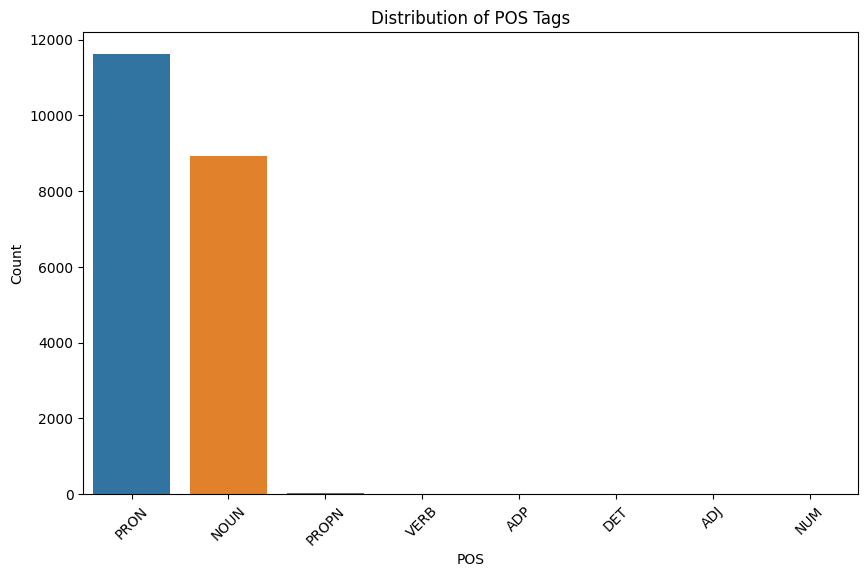

In [55]:
# Plot 1: Distribution of 'POS' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fin, x='POS', order=df_fin['POS'].value_counts().index)
plt.xlabel('POS')
plt.ylabel('Count')
plt.title('Distribution of POS Tags')
plt.xticks(rotation=45)
plt.show()

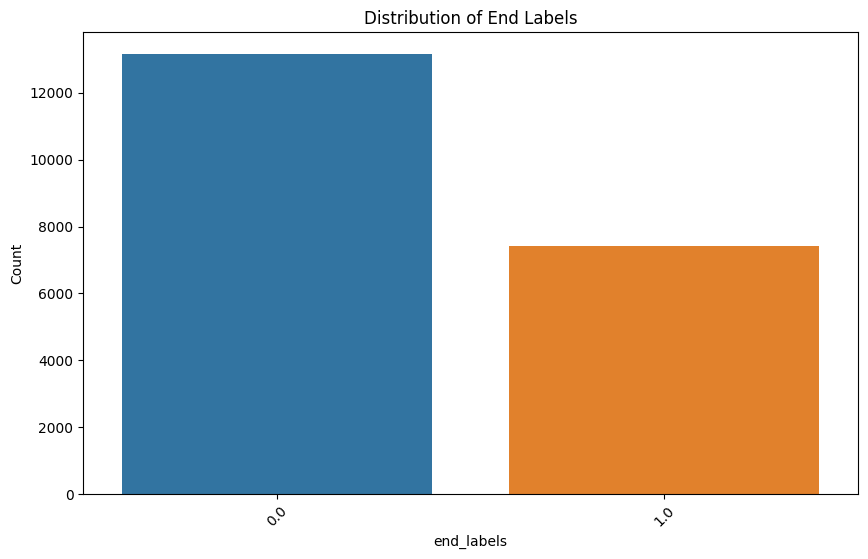

In [56]:
# Plot 2: Distribution of 'end_labels' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fin, x='end_labels', order=df_fin['end_labels'].value_counts().index)
plt.xlabel('end_labels')
plt.ylabel('Count')
plt.title('Distribution of End Labels')
plt.xticks(rotation=45)
plt.show()

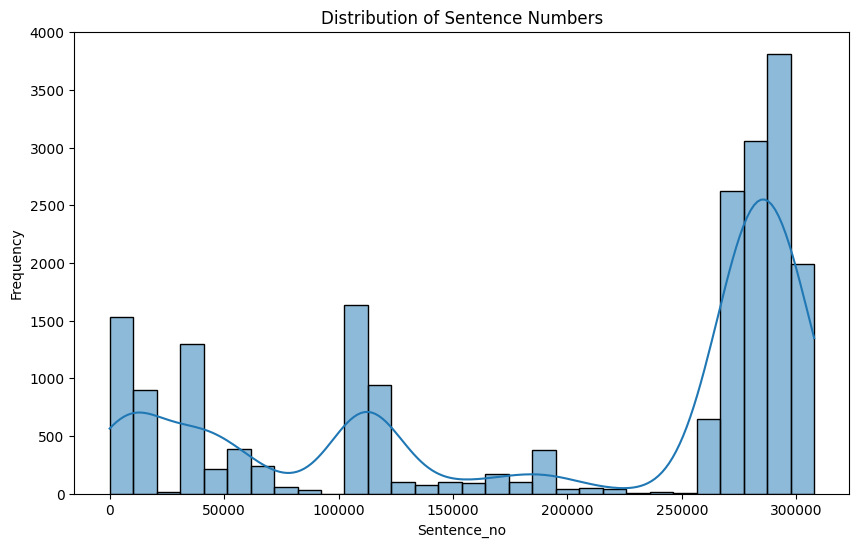

In [57]:
# Plot 3: Distribution of 'Sentence_no' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fin, x='Sentence_no', bins=30, kde=True)
plt.xlabel('Sentence_no')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Numbers')
plt.show()


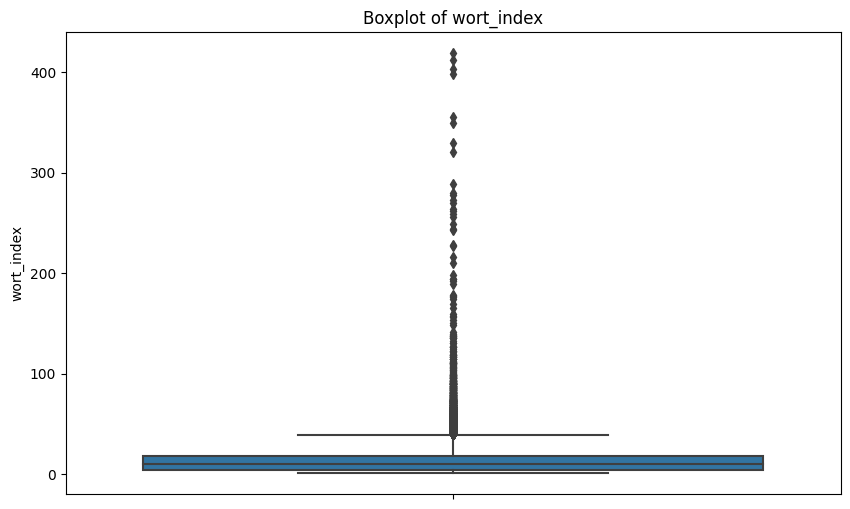

In [58]:
# Plot 4: Boxplot of 'wort_index'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_fin, y='word_index')
plt.ylabel('wort_index')
plt.title('Boxplot of wort_index')
plt.show()

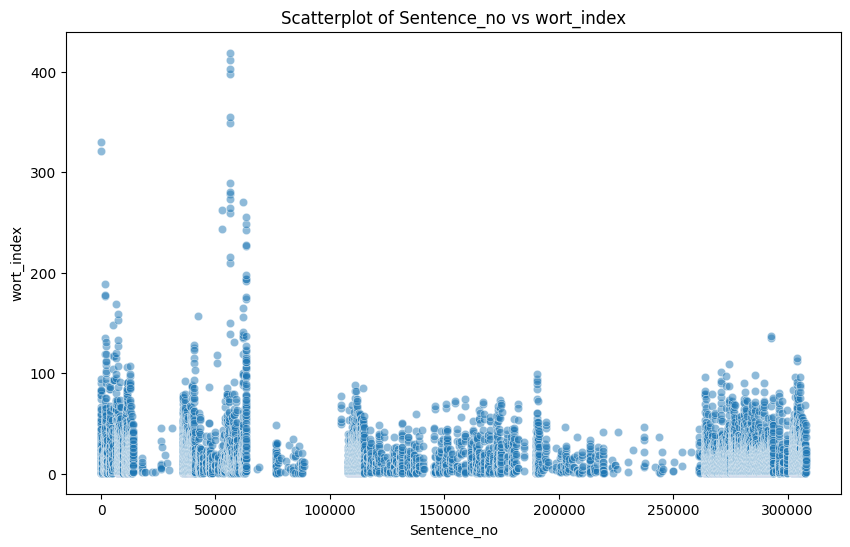

In [59]:
# Plot 5: Example scatterplot (customize as needed)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fin, x='Sentence_no', y='word_index', alpha=0.5)
plt.xlabel('Sentence_no')
plt.ylabel('wort_index')
plt.title('Scatterplot of Sentence_no vs wort_index')
plt.show()

In [60]:
df_fin["end_labels"]= df_fin["end_labels"].astype(int)

# Prob Architecture Implementation

In [61]:
df_fin['end_labels'].value_counts()

0    13156
1     7427
Name: end_labels, dtype: int64

In [62]:
# Standardize input features
scaler = StandardScaler()
X = np.vstack(df_fin['contextualized_vectors'].apply(literal_eval))
X = scaler.fit_transform(X)

In [63]:
samples=len(X)
indicies=np.arange(samples)
df_fin.index=indicies

In [64]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X, df_fin['end_labels'], indicies, test_size=0.2, random_state=30)

In [65]:
# Implement logistic regression or your custom neural network
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8515909642943891
F1-Score: 0.7946218487394959
Confusion Matrix:


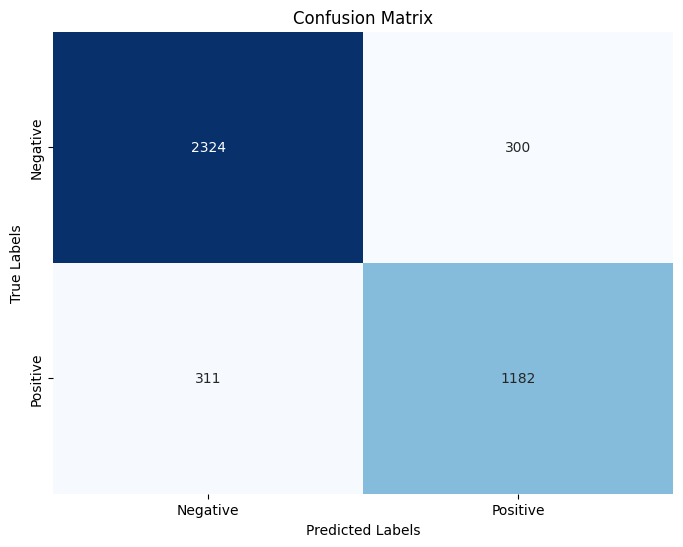

In [66]:

# Evaluate the logistic regression model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Analyzing the results


In [67]:
# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Predict pronouns and compare with true labels
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_pron=0
count_incorrect_pron=0
all_pron=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "PRON":
        all_pron+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_pron+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_pron+=1
print("all_pron",all_pron)
print("correct_pron",count_correct_pron)
print("incorrect_pron",count_incorrect_pron)


    #print("Prediction for words in '{}': {} True Label : {} subtoken : {}".format(row["Word"], y_pred_word[0], row["end_labels"],row["subtoken"]))

all_pron 2380
correct_pron 1816
incorrect_pron 564


In [69]:
# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Predict nouns and compare with true labels
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_noun=0
count_incorrect_noun=0
all_noun=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "NOUN":
        all_noun+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_noun+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_noun+=1
print("all_noun",all_noun)
print("correct_noun",count_correct_noun)
print("incorrect_noun",count_incorrect_noun)

all_noun 1726
correct_noun 1644
incorrect_noun 82


In [70]:
# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Predict PROPN and compare with true labels
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_propn=0
count_incorrect_propn=0
all_propn=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "PROPN":
        all_propn+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_propn+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_propn+=1
print("all_propn",all_propn)
print("correct_propn",count_correct_propn)
print("incorrect_propn",count_incorrect_propn)


all_propn 6
correct_propn 6
incorrect_propn 0


In [71]:


# Extract contextualized vectors
contextualized_vectors = df_fin["contextualized_vectors"]

# Counting the number of correctly and incorrectly classified names with and without subtokens
test_d = df_fin.loc[indices_test, :]
test_d[["Word", "end_labels", "subword", "contextualized_vectors","POS"]]

count_correct_noun_subtoken=0
count_incorrect_noun_subtoken=0
all_noun_subtoken=0
all_noun_without_subtoken=0
count_correct_noun_without_subtoken=0
count_incorrect_noun_without_subtoken=0
for index, row in test_d.iterrows():
    x_text_word = np.array(literal_eval(row["contextualized_vectors"])).reshape(-1, np.array(literal_eval(row["contextualized_vectors"])).shape[-1])
    y_pred_word = lr_model.predict(x_text_word)
    if row["POS"] == "NOUN" and type(row["subword"]) != float:
        all_noun_subtoken+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_noun_subtoken+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_noun_subtoken+=1
    if row["POS"] == "NOUN" and type(row["subword"]) == float:
        all_noun_without_subtoken+=1
        if y_pred_word[0] == row["end_labels"]:
            #print("correct classify",row["Word"])
            count_correct_noun_without_subtoken+=1
        else:
            #print("incorrect classify",row["Word"])
            count_incorrect_noun_without_subtoken+=1


print("all_noun_subtoken",all_noun_subtoken)
print("count_correct_noun_subtoken",count_correct_noun_subtoken)
print("count_incorrect_noun_subtoken",count_incorrect_noun_subtoken)
print("-----------------------------------------------")
print("all_noun_without_subtoken",all_noun_without_subtoken)
print("count_correct_noun_without_subtoken",count_correct_noun_without_subtoken)
print("count_incorrect_noun_without_subtoken",count_incorrect_noun_without_subtoken)

all_noun_subtoken 102
count_correct_noun_subtoken 85
count_incorrect_noun_subtoken 17
-----------------------------------------------
all_noun_without_subtoken 1624
count_correct_noun_without_subtoken 1559
count_incorrect_noun_without_subtoken 65


In [72]:
filtered_pron_without_subtoken = test_d.loc[(test_d['POS'] =="PRON") & (test_d['subword'].isnull())]
len(filtered_pron_without_subtoken)

2379

In [73]:
# Only two pronouns in test-data bekamme from tokenizer subtoken
filtered_pron_subtoken = test_d.loc[(test_d['POS'] =="PRON") & (test_d['subword'].notnull())]
len(filtered_pron_subtoken)

1

In [82]:
# Implement a custom neural network with optimization techniques
class BinaryClassificationNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(BinaryClassificationNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.ReLU()(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

input_dim = X_train.shape[1]
hidden_dim = 50
learning_rate = 0.01
epochs = 40

model = BinaryClassificationNN(input_dim, hidden_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')


Epoch 1/40, Loss: 0.6637763977050781
Epoch 2/40, Loss: 0.487705796957016
Epoch 3/40, Loss: 0.4179171025753021
Epoch 4/40, Loss: 0.3850555717945099
Epoch 5/40, Loss: 0.37013739347457886
Epoch 6/40, Loss: 0.3583933711051941
Epoch 7/40, Loss: 0.34458887577056885
Epoch 8/40, Loss: 0.33525753021240234
Epoch 9/40, Loss: 0.32781490683555603
Epoch 10/40, Loss: 0.3189297318458557
Epoch 11/40, Loss: 0.31163179874420166
Epoch 12/40, Loss: 0.30582618713378906
Epoch 13/40, Loss: 0.29860901832580566
Epoch 14/40, Loss: 0.29254022240638733
Epoch 15/40, Loss: 0.2878694236278534
Epoch 16/40, Loss: 0.2821531891822815
Epoch 17/40, Loss: 0.27656373381614685
Epoch 18/40, Loss: 0.27119964361190796
Epoch 19/40, Loss: 0.265698105096817
Epoch 20/40, Loss: 0.26080816984176636
Epoch 21/40, Loss: 0.25567007064819336
Epoch 22/40, Loss: 0.2499019354581833
Epoch 23/40, Loss: 0.24494026601314545
Epoch 24/40, Loss: 0.2396174967288971
Epoch 25/40, Loss: 0.2342546135187149
Epoch 26/40, Loss: 0.2285042256116867
Epoch 27/4

In [83]:
# Evaluate the custom neural network
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test, dtype=torch.float32)).squeeze()
    predicted_labels = (test_outputs > 0.5).float()
    accuracy = (predicted_labels == torch.tensor(y_test.values, dtype=torch.float32)).float().mean()

print("Custom Neural Network Accuracy:", accuracy.item())

Custom Neural Network Accuracy: 0.8717512488365173


F1-Score for Custom Neural Network: 0.8231748158071


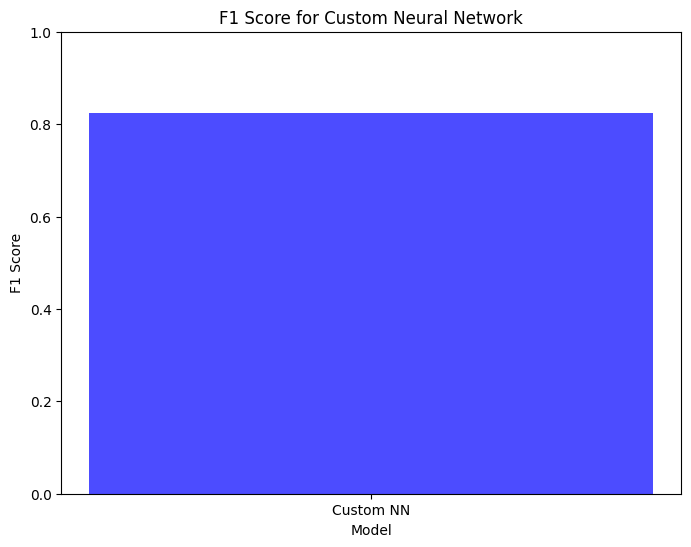

In [84]:
# F1 Score for Custom Neural Network
f1_custom_nn = f1_score(y_test, predicted_labels)

print("F1-Score for Custom Neural Network:", f1_custom_nn)

# Plot F1 Score
plt.figure(figsize=(8, 6))
plt.title("F1 Score for Custom Neural Network")
plt.bar(["Custom NN"], [f1_custom_nn], color='b', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.show()

Confusion Matrix for Custom Neural Network:
[[2360  264]
 [ 264 1229]]


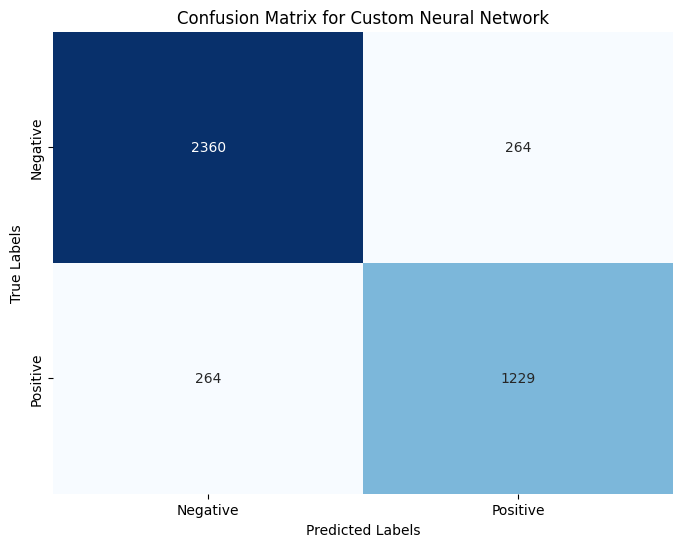

In [85]:

# Confusion Matrix for Custom Neural Network
confusion = confusion_matrix(y_test, predicted_labels)

print("Confusion Matrix for Custom Neural Network:")
print(confusion)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Custom Neural Network')
plt.show()